In [1]:
%matplotlib inline
#%matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
sym.init_printing()
import control

Reference:
https://www.electronics-tutorials.ws/oscillator/wien_bridge.html

In [2]:
s = sym.Symbol('s')
C_1 = sym.Symbol('C1', real=True)
C_2 = sym.Symbol('C2', real=True)
C_ = sym.Symbol('C')
R_1 = sym.Symbol('R1', real=True)
R_2 = sym.Symbol('R2', real=True)
R_ = sym.Symbol('R')
R_f = sym.Symbol('Rf')#, real=True)
R_b = sym.Symbol('Rb', real=True)
w_ = sym.Symbol('w', real=True)
H_s = sym.Symbol('H(s)')

In [3]:
Zser = R_1+1/(s*C_1)
Zser

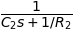

In [4]:
Zpar = 1/((1/R_2)+(1/(1/(C_2*s))))
Zpar

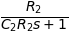

In [5]:
sym.simplify(Zpar)

### Bridge Network Calculation

In [6]:
sym.Eq(Zser/Zpar,R_f/R_b)

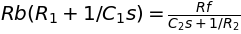

In [7]:
equ0 = sym.Eq(Zser*R_b,Zpar*R_f)
equ0

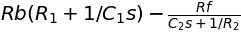

In [8]:
expr0 = (Zser*R_b)-(Zpar*R_f)
expr0

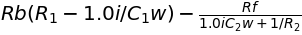

In [9]:
expr1 = expr0.subs(s,1.0j*w_)
expr1

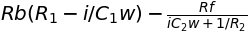

In [10]:
expr2 = expr0.subs(s,sym.I*w_)
expr2

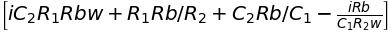

In [11]:
sym.solve(expr1,R_f)

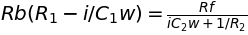

In [12]:
equ1 = equ0.subs(s,sym.I*w_)
equ1

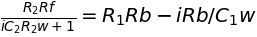

In [13]:
equ2 = sym.simplify(equ1)
equ2

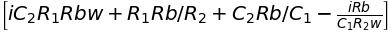

In [14]:
sym.solve(expr2,R_f)

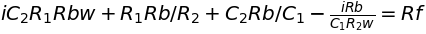

In [15]:
equ3 = sym.Eq(sym.solve(expr2,R_f)[0],R_f)
equ3

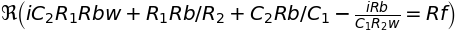

In [16]:
sym.re(equ3)

In [17]:
sym.re(sym.solve(expr2,R_f)[0])

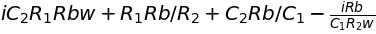

In [18]:
sym.solve(expr2,R_f)[0]

In [19]:
sym.solveset(expr2,R_f,domain=sym.S.Reals)

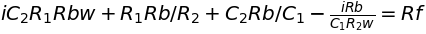

In [20]:
sym.Eq(sym.solve(expr2,R_f)[0],R_f)

In [21]:
expr4 = sym.re(sym.solve(expr2,R_f)[0])
expr4

In [22]:
sym.simplify(sym.Eq(expr4/R_b,R_f/R_b))

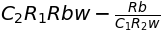

In [23]:
expr5 = sym.im(sym.solve(expr2,R_f)[0])
expr5

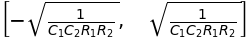

In [24]:
sym.solve(expr5,w_)

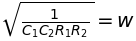

In [25]:
equ5 = sym.Eq(sym.solve(expr5,w_)[1],w_)
equ5

### Transfer Function for Negative Feedback Loop

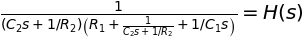

In [26]:
eq1 = sym.Eq((Zpar/(Zser+Zpar)),H_s)
eq1

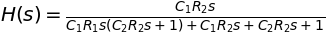

In [27]:
eq1_sim = sym.simplify(eq1)
eq1_sim

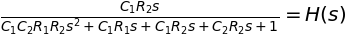

In [28]:
eq1_fac = sym.factor(eq1)
eq1_fac

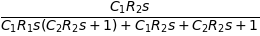

In [29]:
exp1 = sym.simplify(Zpar/(Zser+Zpar))
exp1

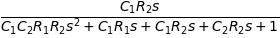

In [30]:
exp2 = sym.factor(Zpar/(Zser+Zpar))
exp2

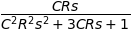

In [31]:
exp3 = exp2.subs([(C_1,C_),(C_2,C_),(R_1,R_),(R_2,R_)])
exp3

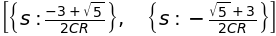

In [32]:
sym.solve(exp3.as_numer_denom()[1],s, dict=True)

# Bode Plots

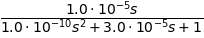

In [33]:
Cval = 1*10**-9
Rval = 10*10**3
exp4 = exp3.subs([(C_,Cval),(R_,Rval)])
exp4

In [34]:
equ5.subs([(C_1,Cval),(C_2,Cval),(R_1,Rval),(R_2,Rval)])

In [35]:
sym.solve(equ5.subs([(C_1,Cval),(C_2,Cval),(R_1,Rval),(R_2,Rval)]))[0]/(2*np.pi)

In [36]:
#fvec = np.logspace(-2,10,1000)
fvec = np.logspace(1,7,1000)
wvec = 2*np.pi*fvec
svec = 1.0j*wvec

In [37]:
exp4num, exp4den = exp4.as_numer_denom()  # expressions

In [38]:
p_num_den = sym.poly(exp4num, s), sym.poly(exp4den, s)  # polynomials
p_num_den

In [39]:
c_num_den = [sym.expand(p).all_coeffs() for p in p_num_den]
c_num_den

In [40]:
l_num, l_den = [sym.lambdify((), c)() for c in c_num_den]  # convert coeffs to floats
print(l_num)
print(l_den)

[1e-05, 0.0]
[1e-10, 3e-05, 1.0]


In [41]:
#B_tf = control.TransferFunction(l_num,l_den)
B_tf = control.TransferFunction(l_num,l_den)
B_tf


        1e-05 s
-----------------------
1e-10 s^2 + 3e-05 s + 1

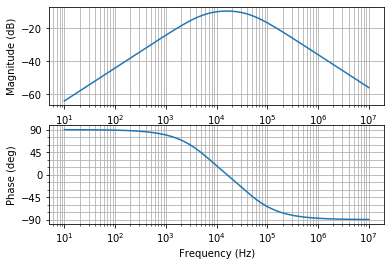

In [42]:
#out = control.bode_plot(B_tf)
out = control.bode_plot(B_tf,wvec,dB=1,Hz=1,deg=1)

In [43]:
B_tfvec = B_tf(svec)
db2 = 20*np.log10(np.abs(B_tfvec))
phase2 = np.angle(B_tfvec,1)

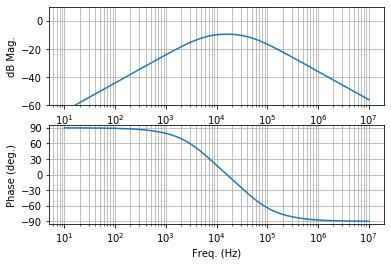

In [44]:
plt.figure()
plt.subplot(211)
plt.semilogx(fvec,db2)
plt.ylabel('dB Mag.')
plt.ylim([-60,10])
#plt.xlim([7*10**2,10**7])
plt.grid(b=True, which='both')
plt.subplot(212)
plt.semilogx(fvec,phase2)
plt.xlabel('Freq. (Hz)')
plt.ylabel('Phase (deg.)')
plt.ylim([-95,95])
plt.grid(b=True, which='both')
out = plt.yticks(np.arange(-90,95,30))

In [45]:
#exp7 = exp6.subs([(C_,1),(R_,1)])
exp7 = exp3.subs([(C_*R_,1)])
exp7

In [46]:
exp7num, exp7den = sym.simplify(exp7).as_numer_denom()  # expressions

In [47]:
exp7num

In [48]:
exp7den

In [49]:
p_num_den = sym.poly(exp7num, s), sym.poly(exp7den, s)  # polynomials
p_num_den

In [50]:
c_num_den = [sym.expand(p).all_coeffs() for p in p_num_den]
c_num_den

In [51]:
l_num, l_den = [sym.lambdify((), c)() for c in c_num_den]  # convert to floats

In [52]:
H_tf = control.TransferFunction(l_num,l_den)
H_tf


      s
-------------
s^2 + 3 s + 1

In [53]:
#G_tf = control.TransferFunction([1,0],[1,3,1])
#num1 = (1,0)
#den1 = (1,3,1)
#H_tf = control.TransferFunction(num1,den1)
H_tf


      s
-------------
s^2 + 3 s + 1

# Root Locus

In [54]:
X_s = sym.Symbol('X(s)')
Y_s = sym.Symbol('Y(s)')
G_s = sym.Symbol('G(s)')
K = sym.Symbol('K')
z_1 = sym.Symbol('z1')
p_1 = sym.Symbol('p1')
p_2 = sym.Symbol('p2')

In [55]:
#Pole locations
sym.solve(exp7den,s, dict=True)

In [56]:
[x.evalf() for x in sym.solve(exp7den,s)]

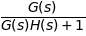

In [57]:
exp8 = G_s/(1+G_s*H_s)
exp8

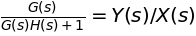

In [58]:
eq8 = sym.Eq(exp8,Y_s/X_s)
eq8

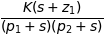

In [59]:
exp9 = K*(s+z_1)/((s+p_1)*(s+p_2))
exp9

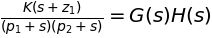

In [60]:
eq9 = sym.Eq(exp9,G_s*H_s)
eq9

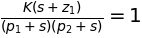

In [61]:
eq10 = sym.Eq(exp9,1)
eq10

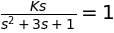

In [62]:
eq11 = sym.Eq(K*exp7,1)
eq11

In [63]:
eq12 = sym.Eq(s**2+(3-K)*s+1,0)
eq12

In [64]:
sym.simplify(s**2+(3-K)*s+1)

In [65]:
eq13 = sym.solve(eq11,s, dict=True)
eq13

### K = 0, poles become:

In [66]:
eq14 = eq12.subs(K,0)
eq14

In [67]:
sym.solve(eq14,s, dict=True)

### K = 0.001, poles become:

In [68]:
sym.solve(eq11.subs([(K,0.001)]),s, dict=True)

### K is 1, poles become:

In [69]:
sym.solve(eq11.subs([(K,1)]),s, dict=True)

### K is 2, poles become:

In [70]:
sym.solve(eq11.subs([(K,2)]),s, dict=True)

### K is 3, poles become:

In [71]:
sym.solve(eq11.subs([(K,3)]),s, dict=True)

### K is 4, poles become:

In [72]:
sym.solve(eq11.subs([(K,4)]),s, dict=True)

### K is 5, poles become:

In [73]:
sym.solve(eq11.subs([(K,5)]),s, dict=True)

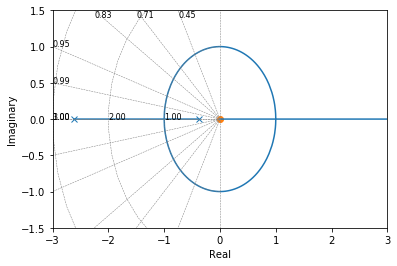

In [74]:
Out_rl = control.root_locus(sys=(-H_tf), xlim=(-3,3), ylim=(-1.5,1.5))